<a href="https://colab.research.google.com/github/David-Gentil/David-Gentil/blob/main/Criando_m%C3%A9tricas_e_KPIs_para_uma_loja_de_varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""O objetivo é criar métricas e KPIs para uma loja de varejo, unindo e tratando duas bases de dados: vendas e clientes.

Métricas e KPIs foram solicitados pela loja de varejo:

*Departamentos Mais Vendidos;
*Média de Preço e Frete por Departamento;
*Vendas por Mês;
*Média de Renda por Canal de Venda;
*Média de Idade por Bandeira;

Premissas:

*Para vendas sem informação de estado (UF), o estado deverá ser preenchido automaticamente como MS.
*Devemos criar uma rotina de validação nos dados para identificar e tratar as ocorrências onde preço > preço + frete."""

'O objetivo é criar métricas e KPIs para uma loja de varejo, unindo e tratando duas bases de dados: vendas e clientes.\n\nMétricas e KPIs foram solicitados pela loja de varejo:\n\n*Departamentos Mais Vendidos;\n*Média de Preço e Frete por Departamento;\n*Vendas por Mês;\n*Média de Renda por Canal de Venda;\n*Média de Idade por Bandeira;\n\nPremissas:\n\n*Para vendas sem informação de estado (UF), o estado deverá ser preenchido automaticamente como MS.\n*Devemos criar uma rotina de validação nos dados para identificar e tratar as ocorrências onde preço > preço + frete.'

In [3]:
#Importando o Panda
import pandas as pd

#Importando o Seaborn
import seaborn as sns

In [4]:
#Abrindo a Base Varejo
vendas = pd.read_excel("/content/varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [5]:
#Exibindo informações da base Vendas
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [6]:
#Agrupando por canal de Vendas
vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


In [7]:
#Substituindo " " dos nomes dos departamentos por "_"
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP","Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [8]:
#Agrupando por bandeira
vendas.groupby("bandeira").idcompra.nunique().reset_index()

,bandeira,idcompra
0,A,27679
1,B,38483


In [9]:
#Agrupando por Nome de departamento
vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()

,Nome_Departamento,idcompra
0,Acessorios e Inovacoes,3548
1,Alimentos,2
2,Ar e Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza e Saude,4626
7,Brinquedos,1320
8,"Cama, Mesa e Banho",153
9,Casa e Construcao,263


In [10]:
#Agrupando por Estado
vendas.groupby('estado').idcompra.nunique().reset_index()

,estado,idcompra
0,AC,10
1,AL,461
2,AM,15
3,AP,3
4,BA,2028
5,CE,1007
6,DF,1902
7,ES,1254
8,GO,1603
9,MA,129


In [11]:
#Substituindo " " dos nomes dos departamentos por "_"
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ","_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [12]:
#Verificando Informações de vendas
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [13]:
#Verificando linhas onde a coluna estado é nula
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [14]:
#Eliminando linhas com valores nulos
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [15]:
#Substituindo Estados nulos por "MS"
vendas["estado"] = vendas["estado"].fillna("MS")

In [16]:
vendas["estado"].fillna("MS", inplace=True)

<ipython-input-16-959a4bdfbea9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["estado"].fillna("MS", inplace=True)


In [17]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [18]:
#Calculando a média dos preços e substituindo valores nulos pela média
media_preco = vendas["Preço"].mean()

vendas["Preço"].fillna(media_preco, inplace= True)


<ipython-input-18-89e0be2ff5c7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["Preço"].fillna(media_preco, inplace= True)


In [19]:
media_preco.round(2)

906.59

In [20]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [21]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [22]:
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [32]:
preço_errado = vendas[vendas["Preço"] >= vendas["Preço_com_frete"]]

vendas_correto = vendas[vendas["Preço"] < vendas["Preço_com_frete"]]

In [33]:
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [38]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [115]:
# Verificando os departamentos mais vendidos
Mais_vendidos = vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()
Mais_vendidos

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [102]:
#Verificando Média de Preço e Frete por Departamento
Media_departamento = round(vendas_correto.groupby("Nome_Departamento").mean('Preço').reset_index().sort_values(by="Preço", ascending=False),2)
Media_departamento

,Nome_Departamento,idcompra,Preço,Preço_com_frete,cliente_Log,mês
27,TVs_e_Acessorios,240849.56,3279.38,3469.38,14107.58,2.41
17,Informatica,251415.30,2106.80,2159.78,13979.42,2.58
19,Linha_Industrial,180520.56,1948.70,2027.11,13204.33,2.56
10,Cine_e_Foto,283713.75,1836.54,1851.20,17496.00,3.12
12,Eletrodomesticos,246889.83,1376.82,1400.66,13799.15,2.51
29,Telefones_e_Celulares,275507.54,1342.71,1442.19,13105.19,2.43
14,Esporte_e_Lazer,259501.55,1093.12,1123.14,14239.48,2.52
28,Tablets,286039.77,1057.56,1100.23,13605.23,2.62
16,Games,243268.08,926.10,942.90,13899.32,2.45
18,Instrumentos_Musicais,261915.00,831.20,834.61,460.00,4.00


In [60]:
# Verificando Vendas por Mês

#Criando coluna de Mês
vendas_correto['mês'] = vendas_correto['Data'].dt.month

<ipython-input-60-afc04f87aa23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['mês'] = vendas_correto['Data'].dt.month


In [99]:
#Agrupando as vendas por mês
Vendas_mes = vendas_correto.groupby("mês").idcompra.nunique().reset_index()
Vendas_mes

,mês,idcompra
0,1,5309
1,2,5138
2,3,5590
3,4,5454


In [61]:
#Extraindo base Cliente
Cliente = pd.read_excel("/content/cliente_varejo.xlsx")
Cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [62]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [65]:
round(Cliente.describe(),2).reset_index()

,index,cliente_Log,idade,renda
0,count,26425.00,26425.00,26425.00
1,mean,13937.41,53.41,8241.47
2,std,8066.94,20.70,3899.87
3,min,1.00,18.00,1500.00
4,25%,6920.00,35.00,4859.00
5,50%,13946.00,53.00,8234.00
6,75%,20926.00,71.00,11629.00
7,max,27982.00,89.00,15000.00


In [66]:
Cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [69]:
Cliente = Cliente.astype({"renda":"float"})
Cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [70]:
#Fazendo o join entre as tabelas
Vendas_Cliente = pd.merge(vendas_correto, Cliente, on="cliente_Log")
Vendas_Cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [87]:
#Verificando Média de Renda por Canal de Venda
Media_canal = round(Vendas_Cliente.groupby("idcanalvenda").renda.mean().reset_index(),2).sort_values(by="renda", ascending=False)
Media_canal

,idcanalvenda,renda
0,Aplicativo,8244.85
2,Mobile,8222.72
1,Internet,8211.84


In [82]:
# Verificando Média de Idade por Bandeira
Media_bandeira = round(Vendas_Cliente.groupby("bandeira").idade.mean().reset_index(),2).sort_values(by="idade", ascending=False)
Media_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [78]:
#Inserindo Visuais

#Importando Matplotlib
import matplotlib.pyplot as plt

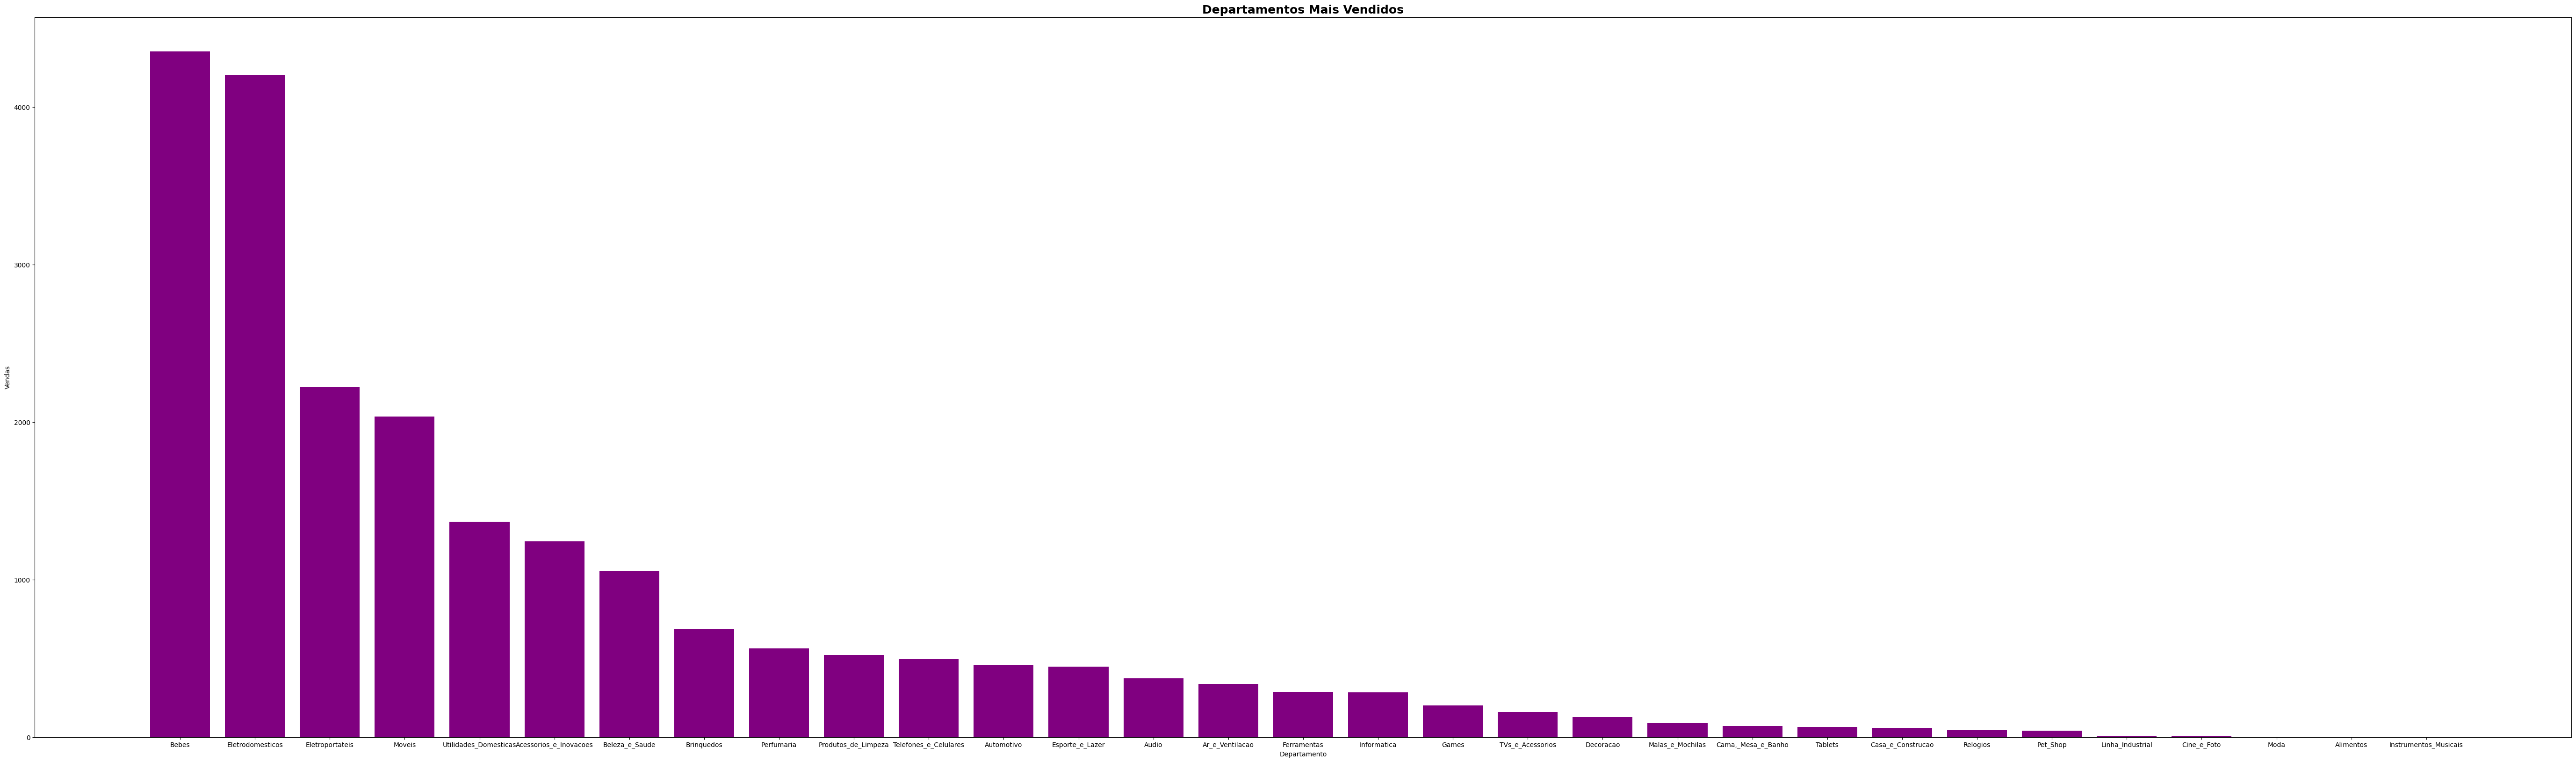

In [116]:
#Plotando gráfico dos mais vendidos por departamento
fig = plt.figure(figsize=(70,20))
plt.bar(Mais_vendidos["Nome_Departamento"], Mais_vendidos["idcompra"], color="purple");
plt.title("Departamentos Mais Vendidos", loc="center", fontsize="18", fontweight="bold");
plt.xlabel("Departamento");
plt.ylabel("Vendas");

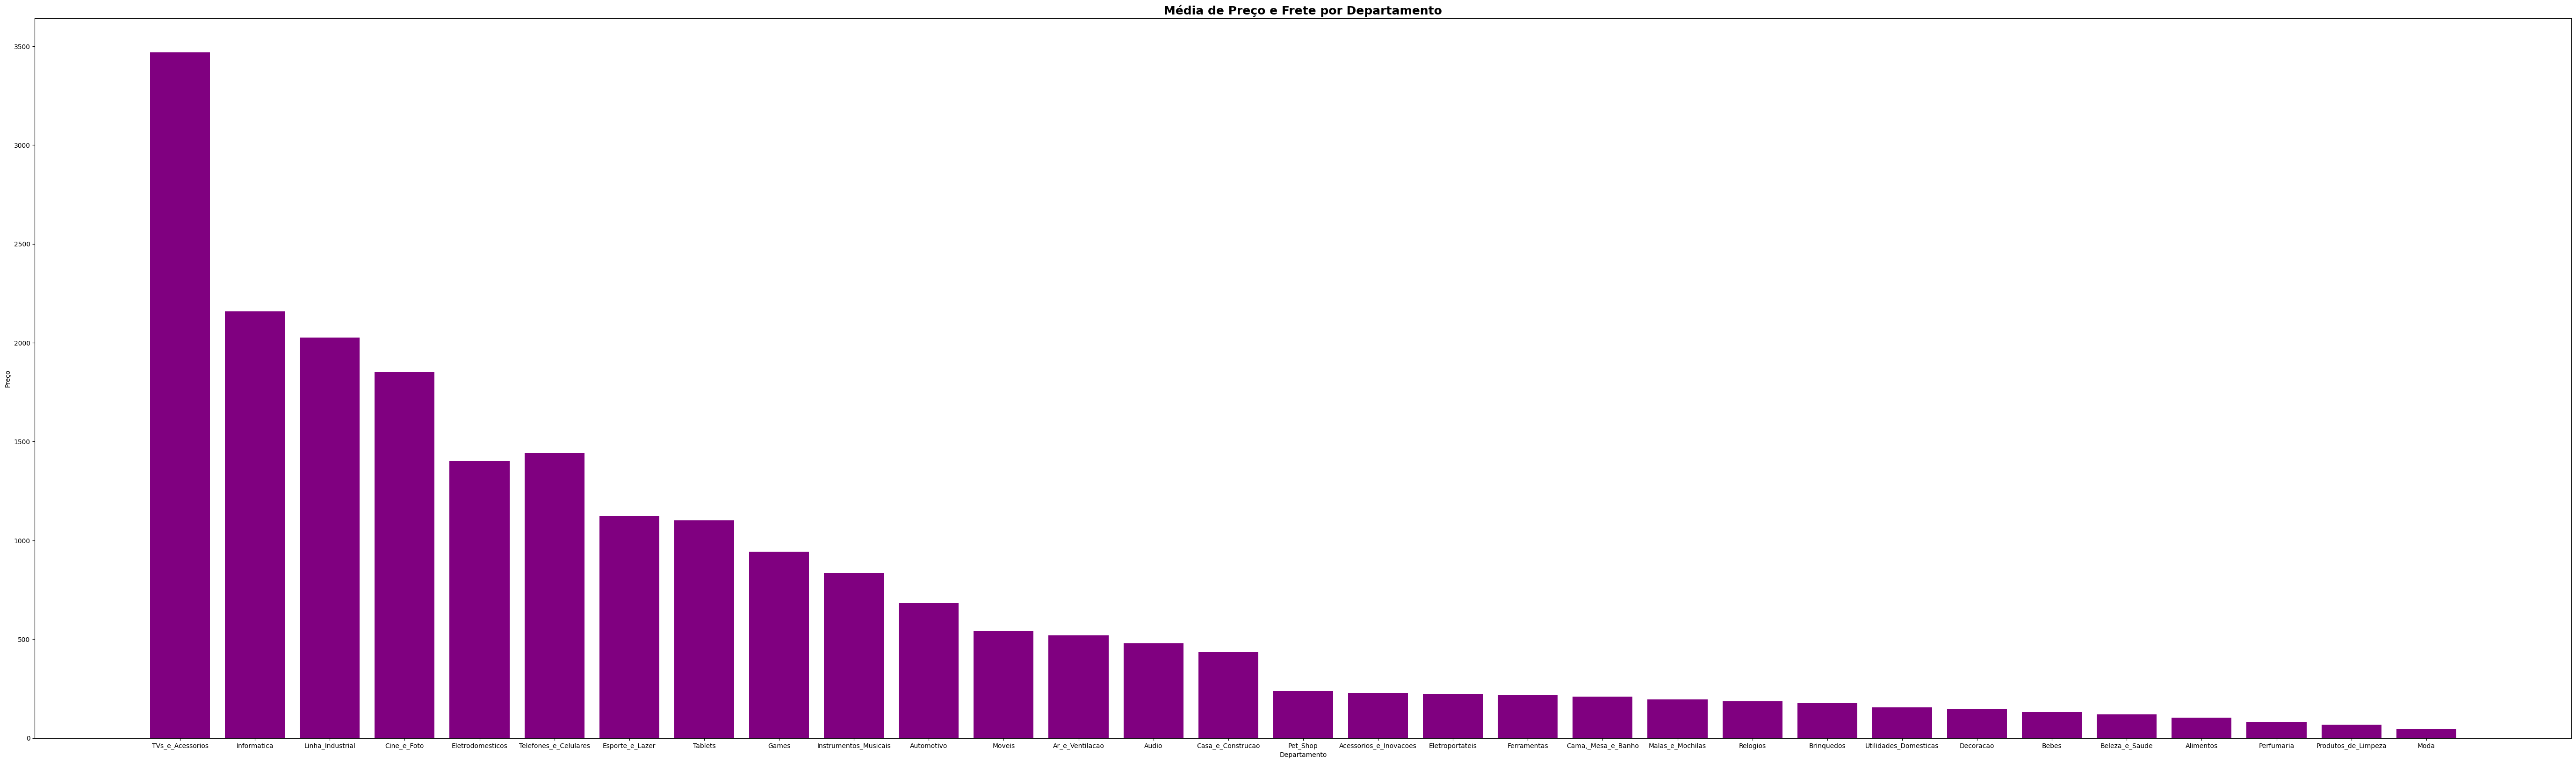

In [112]:
#plotando gráfico da Média de Preço e Frete por Departamento
fig = plt.figure(figsize=(70,20))
plt.bar(Media_departamento["Nome_Departamento"], Media_departamento["Preço_com_frete"], color="purple");
plt.title("Média de Preço e Frete por Departamento", loc="center", fontsize="18", fontweight="bold");
plt.xlabel("Departamento");
plt.ylabel("Preço");

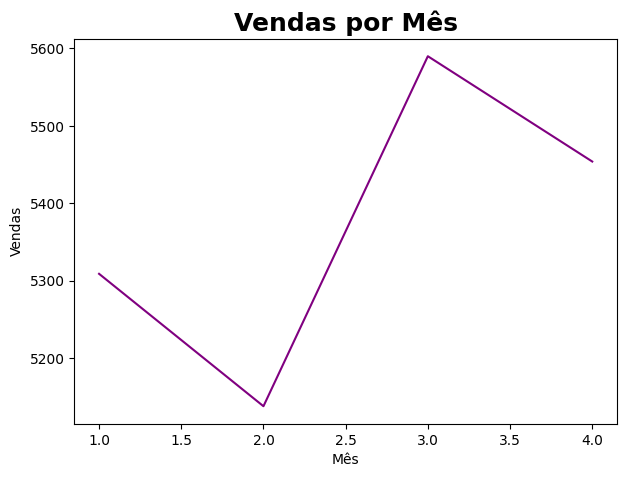

In [100]:
#plotando gráfico das Vendas por Mês
fig = plt.figure(figsize=(7,5))
plt.title("Vendas por Mês", loc="center", fontsize="18", fontweight="bold");
plt.xlabel("Mês");
plt.ylabel("Vendas");
x = Vendas_mes["mês"]
y = Vendas_mes["idcompra"]
plt.plot (x, y, color="purple");
plt.show()

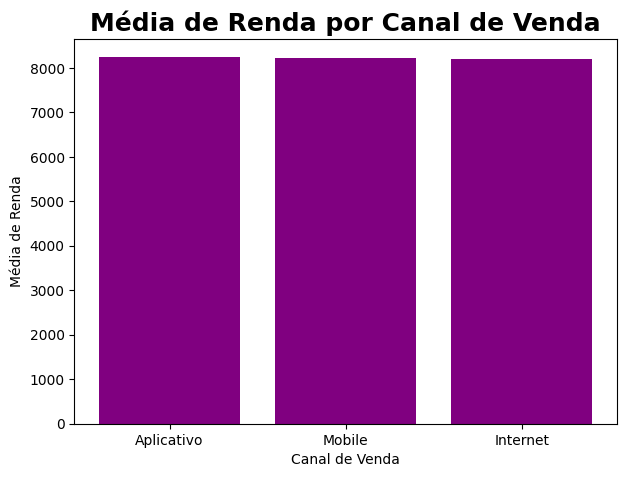

In [93]:
#plotando gráfico da Média de Renda por Canal de Venda

fig = plt.figure(figsize=(7,5))
plt.bar(Media_canal["idcanalvenda"], Media_canal["renda"], color="purple");
plt.title("Média de Renda por Canal de Venda", loc="center", fontsize="18", fontweight="bold");
plt.xlabel("Canal de Venda");
plt.ylabel("Média de Renda");

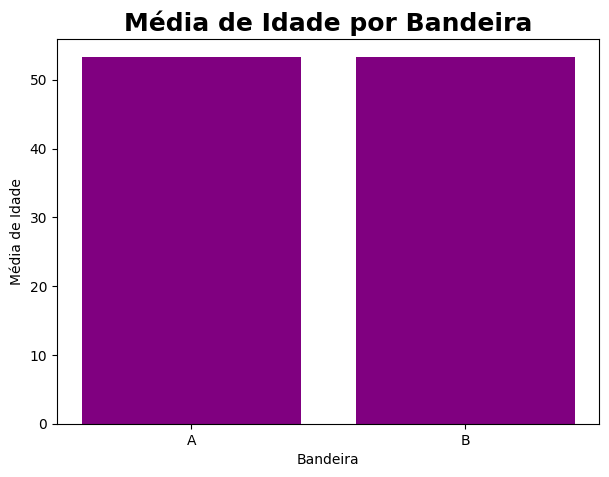

In [92]:
#plotando gráfico da Média de Idade por Bandeira
fig = plt.figure(figsize=(7,5))
plt.bar(Media_bandeira["bandeira"], Media_bandeira["idade"], color="purple");
plt.title("Média de Idade por Bandeira", loc="center", fontsize="18", fontweight="bold");
plt.xlabel("Bandeira");
plt.ylabel("Média de Idade");

In [117]:
#Instalando a biblioteca Plotly
%pip install plotly
%pip install cufflinks
%pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.4 MB/s eta 0:00:00


In [120]:
#Importando as bibliotecas instaladas
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

In [121]:
#Plotando gráfico dos mais vendidos por departamento
px.bar(Mais_vendidos, x="Nome_Departamento", y="idcompra", title="Departamentos Mais Vendidos")

In [122]:
#plotando gráfico da Média de Preço e Frete por Departamento
px.bar(Media_departamento, x="Nome_Departamento", y="Preço_com_frete", title="Média de Preço e Frete por Departamento")

In [123]:
#plotando gráfico das Vendas por Mês
px.line(Vendas_mes, x="mês", y="idcompra", title="Vendas por Mês")

In [124]:
#plotando gráfico da Média de Idade por Bandeira
px.bar(Media_bandeira, x="bandeira", y="idade", title="Média de Idade por Bandeira")